In [3]:
#import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("africa_food_prices.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'african_food_prices.csv'

### Exploratory Data Analysis

In [ ]:
#to view the first five rows of the data
df.head()

In [ ]:
# to view the last ten rows of the data
df.tail(10)

In [ ]:
#To view how many rows and columns the dataset has
df.shape

In [10]:
#show columns present in the dataset
df.columns

Index(['Unnamed: 0', 'country_id', 'country', 'state_id', 'state', 'market_id',
       'market', 'produce_id', 'produce', 'currency_id', 'currency', 'pt_id',
       'market_type', 'um_unit_id', 'quantity', 'month', 'year', 'price',
       'mp_commoditysource'],
      dtype='object')

In [ ]:
#show structure of the DataFrame, including the presence of missing values and the data types of each column
df.info()

In [ ]:
#groups the dataframe by country
df_group = df.groupby('country')
df_group.first()

In [ ]:
#shows the data type of each column in the DataFrame
df.dtypes

In [ ]:
#summary statistics for country
df.value_counts('country')

In [15]:
#15 Most recurring countries
top_15_Countries = df['country'].value_counts().head(15)
print(top_15_Countries)

country
Rwanda        137746
Mali           73843
Burundi        60921
Gambia         56971
Niger          54974
Nigeria        50285
Zambia         42793
Mozambique     42278
Libya          41207
Benin          39530
Senegal        33563
Ghana          25414
Ethiopia       24627
Malawi         22682
Cameroon       22476
Name: count, dtype: int64


### Data Cleaning and Transformation

In [17]:
#remove columns
df.drop(columns=['Unnamed: 0','mp_commoditysource','currency_id','country_id',
                 'market_id','state_id','produce_id','pt_id','quantity'],  inplace= True)

In [18]:
#detecting missing values in 'state' column
df.isnull()['state']

0         False
1         False
2         False
3         False
4         False
          ...  
956774    False
956775    False
956776    False
956777    False
956778    False
Name: state, Length: 956779, dtype: bool

In [19]:
# replacing missing values in state with 'Ikeja'
df.fillna("Ikeja", inplace=True)

In [20]:
#cross check if there are any null values left
df.isnull().sum()

country        0
state          0
market         0
produce        0
currency       0
market_type    0
um_unit_id     0
month          0
year           0
price          0
dtype: int64

In [21]:
#renaming two columns
df.rename({'um_unit_id': 'qty_exchanged'}, axis=1, inplace=True)

In [23]:
df.rename({'state': 'locality'}, axis=1, inplace=True)

In [54]:
#to get unique values from the "locality"
df.locality.unique()

array(['Alger', 'Tindouf', 'Luanda', 'Lunda Norte', 'Alibori', 'Atakora',
       'Atlantique', 'Borgou', 'Collines', 'Couffo', 'Donga', 'Littoral',
       'Mono', 'Oueme', 'Plateau', 'Zou', 'Bubanza', 'Bujumbura Mairie',
       'Bujumbura Rural', 'Bururi', 'Cankuzo', 'Cibitoke', 'Gitega',
       'Karuzi', 'Kayanza', 'Kirundo', 'Makamba', 'Muramvya', 'Muyinga',
       'Mwaro', 'Ngozi', 'Rutana', 'Ruyigi', 'Adamaoua', 'Centre', 'Est',
       'Extreme - Nord', 'Nord', 'Nord - Ouest', 'Ouest', 'Sud - Ouest',
       'Santiago', 'Santo Antao', 'Sao Vicente', 'Bamingui-Bangoran',
       'Haut-Mbomou', 'Haute-Kotto', 'Kémo', 'Lobaye', 'Mambéré-Kadéï',
       'Mbomou', 'Nana-Gribizi', 'Nana-Mambéré', "Ombella M'Poko",
       'Ouaka', 'Ouham', 'Ouham Pendé', 'Sangha-Mbaéré', 'Vakaga',
       'Bangui', 'Ikeja', 'Bouenza', 'Cuvette', 'Lekoumou', 'Likouala',
       'Pool', 'Point-Noire', 'Brazzaville', 'Ali Sabieh', 'Dikhil',
       'Djibouti', 'Obock', 'Tadjourah', 'Maekel', 'Semenawi Keih Bahri',

In [55]:
#to get the number of unique values from the "locality"
df.locality.nunique()

312

In [56]:
#to count the occurrences of each unique value 
df.locality.value_counts()

locality
Ikeja                  126678
North/Amajyaruguru      34770
South/Amajyepfo         31610
East/Iburasirazuba      30805
West/Iburengerazuba     30032
                        ...  
Tiris-Zemmour              29
Toliara                    24
Kabale                     24
Lunda Norte                24
Semenawi Keih Bahri        18
Name: count, Length: 312, dtype: int64

In [24]:
#print columns
df.columns

Index(['country', 'locality', 'market', 'produce', 'currency', 'market_type',
       'qty_exchanged', 'month', 'year', 'price'],
      dtype='object')

In [25]:
#the summary statistics for each object (string) column in the DataFrame, 
#including the count of non-null values, the number of unique values, 
#the most frequent value (top), and its frequency (freq)

df.select_dtypes(include=['object']).describe()

,country,locality,market,produce,currency,market_type
count,956779,956779,956779,956779,956779,956779
unique,42,312,1696,457,34,3
top,Rwanda,Ikeja,Serrekunda,Millet - Retail,XOF,Retail
freq,137746,126678,4130,47476,227321,885918


In [26]:
#summary statistics for each numerical column

df.describe()

,qty_exchanged,month,year,price
count,956779.000000,956779.000000,956779.000000,9.567790e+05
mean,14.017183,6.381471,2015.704015,4.128833e+03
std,24.437728,3.418025,4.603829,1.381840e+05
min,5.000000,1.000000,1990.000000,0.000000e+00
25%,5.000000,3.000000,2013.000000,6.500000e+01
50%,5.000000,6.000000,2017.000000,2.505714e+02
75%,9.000000,9.000000,2020.000000,7.221005e+02
max,175.000000,12.000000,2021.000000,1.725000e+07


In [27]:
#5 Most re-ocurring produce
df.value_counts('produce').head()

produce
Millet - Retail             47476
Rice (imported) - Retail    47022
Sorghum - Retail            44679
Maize - Retail              43073
Maize (white) - Retail      33786
Name: count, dtype: int64

In [28]:
#To clean the produce column
#Extract everything before the first parenthesis
df['core_produce'] = df['produce'].str.extract(r'([^\(]+)')

# split by hyphen and take the first part
df['core_produce'] = df['core_produce'].str.split('-').str[0]

# Remove any whitespace
df['core_produce'] = df['core_produce'].str.strip()

print(df[['produce', 'core_produce']])

                        produce   core_produce
0                 Rice - Retail           Rice
1                 Rice - Retail           Rice
2                 Rice - Retail           Rice
3                 Rice - Retail           Rice
4                 Rice - Retail           Rice
...                         ...            ...
956774   Beans (sugar) - Retail          Beans
956775      Toothpaste - Retail     Toothpaste
956776    Laundry soap - Retail   Laundry soap
956777   Handwash soap - Retail  Handwash soap
956778  Fish (kapenta) - Retail           Fish

[956779 rows x 2 columns]


In [29]:
df.core_produce.unique()

array(['Rice', 'Bread', 'Beans', 'Milk', 'Potatoes', 'Eggs', 'Meat',
       'Sugar', 'Lentils', 'Pasta', 'Tomatoes', 'Oil', 'Cheese',
       'Carrots', 'Onions', 'Bananas', 'Tea', 'Fuel', 'Fish', 'Apples',
       'Oranges', 'Cassava flour', 'Maize flour', 'Salt', 'Maize meal',
       'Maize', 'Sorghum', 'Millet', 'Wheat', 'Sweet potatoes', 'Yam',
       'Plantains', 'Cabbage', 'Peas', 'Soybeans', 'Cassava', 'Lemons',
       'Wheat flour', 'Cassava meal', 'Papaya', 'Okra', 'Groundnuts',
       'Peppers', 'Coconut', 'Leafy vegetables', 'Shrimps', 'Taro',
       'Snail', 'Avocados', 'Chicken', 'Cocoyam', 'Sesame', 'Wage',
       'Cowpeas', 'Squashes', 'Charcoal', 'Water', 'Laundry soap',
       'Laundry detergent', 'Exchange rate', 'Livestock', 'Peanut',
       'Garlic', 'Ghee', 'Chickpeas', 'Barley', 'Teff', 'Lin seed',
       'Niger seed', 'Rape seed', 'Butter', 'Coffee', 'Lettuce',
       'Beetroots', 'Guava', 'Mangoes', 'Kale', 'Swiss chard', 'Honey',
       'Corn Soy Blend', 'Kocho',

In [30]:
df.core_produce.unique()

array(['Rice', 'Bread', 'Beans', 'Milk', 'Potatoes', 'Eggs', 'Meat',
       'Sugar', 'Lentils', 'Pasta', 'Tomatoes', 'Oil', 'Cheese',
       'Carrots', 'Onions', 'Bananas', 'Tea', 'Fuel', 'Fish', 'Apples',
       'Oranges', 'Cassava flour', 'Maize flour', 'Salt', 'Maize meal',
       'Maize', 'Sorghum', 'Millet', 'Wheat', 'Sweet potatoes', 'Yam',
       'Plantains', 'Cabbage', 'Peas', 'Soybeans', 'Cassava', 'Lemons',
       'Wheat flour', 'Cassava meal', 'Papaya', 'Okra', 'Groundnuts',
       'Peppers', 'Coconut', 'Leafy vegetables', 'Shrimps', 'Taro',
       'Snail', 'Avocados', 'Chicken', 'Cocoyam', 'Sesame', 'Wage',
       'Cowpeas', 'Squashes', 'Charcoal', 'Water', 'Laundry soap',
       'Laundry detergent', 'Exchange rate', 'Livestock', 'Peanut',
       'Garlic', 'Ghee', 'Chickpeas', 'Barley', 'Teff', 'Lin seed',
       'Niger seed', 'Rape seed', 'Butter', 'Coffee', 'Lettuce',
       'Beetroots', 'Guava', 'Mangoes', 'Kale', 'Swiss chard', 'Honey',
       'Corn Soy Blend', 'Kocho',

In [31]:
df.core_produce.nunique()

120

In [32]:
#pandas grouby
grouped_marketype = df.groupby('market_type')['price'].sum().reset_index()
grouped_marketype

,market_type,price
0,Producer,1.652520e+05
1,Retail,3.337879e+09
2,Wholesale,6.123368e+08


### Visual Data Exploration

In [33]:
#market type categories
grouped_marketype = grouped_marketype.sort_values(by = 'price', ascending = False)

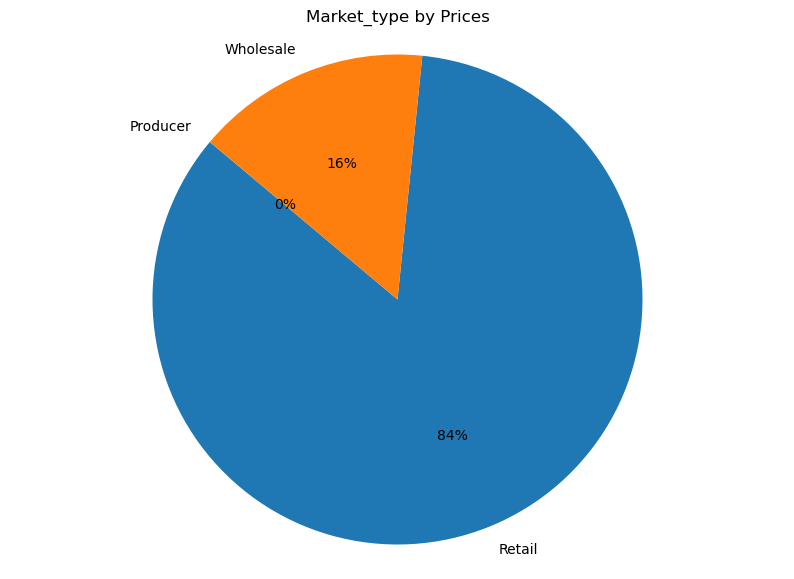

In [34]:
plt.figure(figsize=(10, 7))
plt.pie(grouped_marketype['price'],
        labels=grouped_marketype['market_type'], autopct='%1.0f%%', startangle=140)
plt.title('Market_type by Prices')
plt.axis('equal')
plt.show()

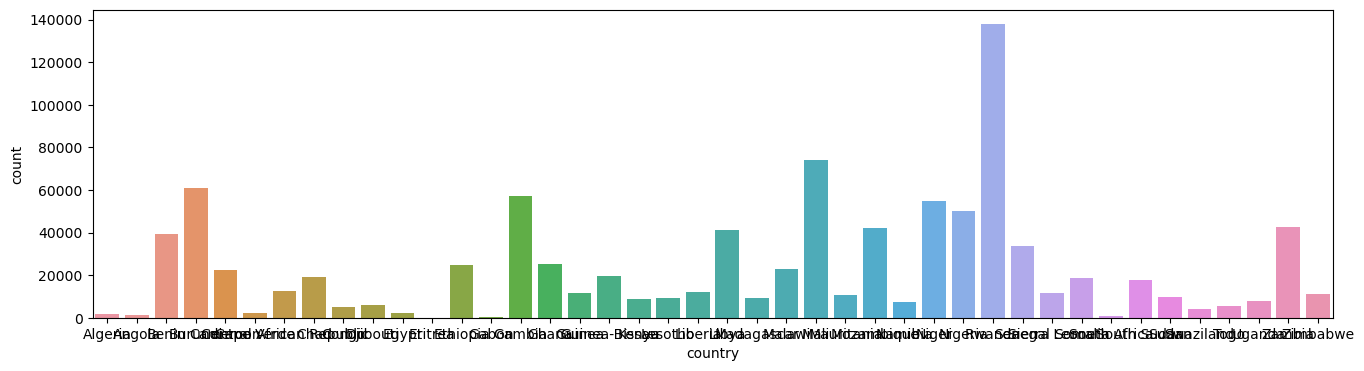

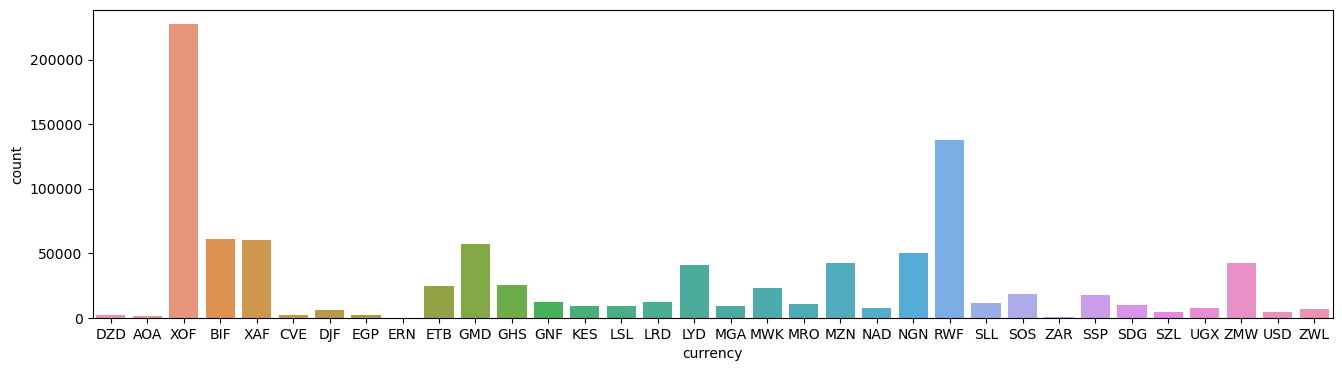

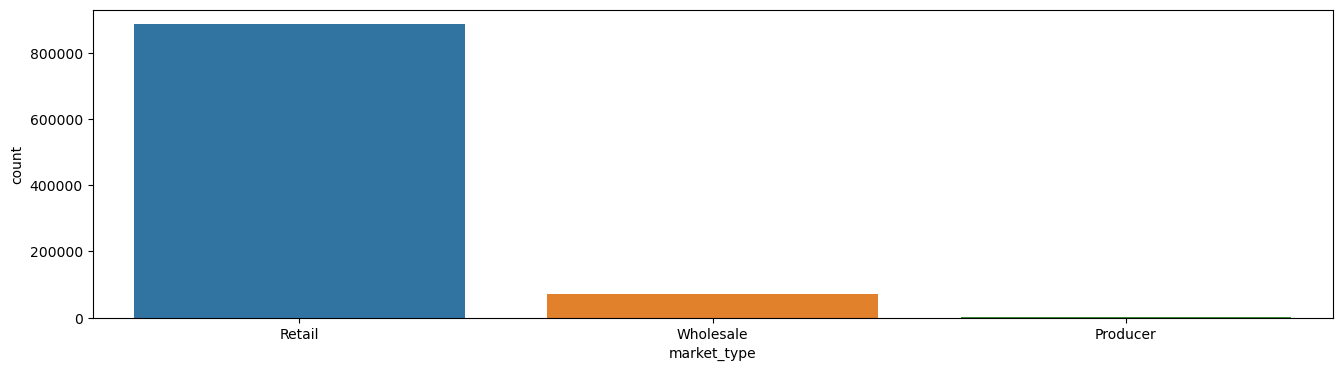

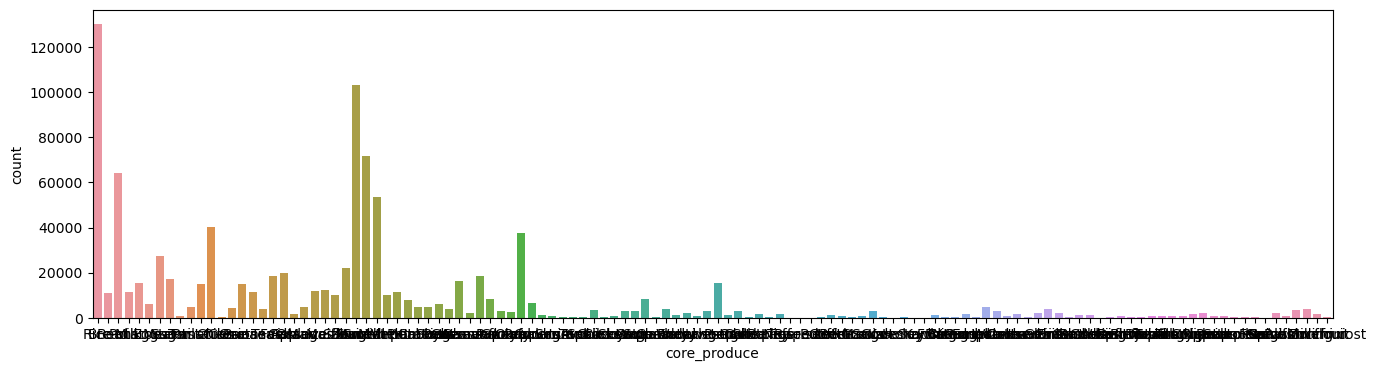

In [35]:
for col in df.select_dtypes(include='object').columns:
    if col not in ['locality', 'market','produce']:
        plt.figure(figsize=(16,4))
        sns.countplot(data=df, x=col)
        plt.show()

### Research Questions:

### 1) Which category of food items have the highest and lowest average prices?

In [57]:
avg_prices_perItem = df.groupby('produce')['price'].mean().sort_values()
avg_prices_perItem

produce
Maize (yellow, biofortified) - Retail     2.800000e-01
Maize meal (white, fortified) - Retail    5.150725e-01
Maize flour (white) - Retail              6.375000e-01
Sorghum (biofortified) - Retail           1.000000e+00
Sugar (white, fortified) - Retail         1.265437e+00
                                              ...     
Livestock (pig) - Retail                  4.726878e+04
Livestock (Goat) - Retail                 9.356608e+04
Livestock (cattle) - Retail               1.278650e+05
Livestock (camel) - Retail                1.924199e+05
Meat (camel) - Retail                     1.538793e+06
Name: price, Length: 457, dtype: float64

In [37]:
highest_avg_Price = avg_prices_perItem.tail(1)

In [38]:
lowest_avg_Price = avg_prices_perItem.head(1)

In [39]:
print("Highest Average Price:", highest_avg_Price)
print("Lowest Average Price:", lowest_avg_Price)  

Highest Average Price: produce
Meat (camel) - Retail    1.538793e+06
Name: price, dtype: float64
Lowest Average Price: produce
Maize (yellow, biofortified) - Retail    0.28
Name: price, dtype: float64


### 2) In what countries is beans cultivated?

In [41]:
#Cleaned produce column without the bracets and grouping
df['core_produce']

0                  Rice
1                  Rice
2                  Rice
3                  Rice
4                  Rice
              ...      
956774            Beans
956775       Toothpaste
956776     Laundry soap
956777    Handwash soap
956778             Fish
Name: core_produce, Length: 956779, dtype: object

In [42]:
#all category of beans
Beans = df[df['core_produce'] == 'Beans']

In [43]:
Beans_countries = Beans['country'].unique()
Beans_countries 

array(['Algeria', 'Angola', 'Benin', 'Burundi', 'Cameroon',
       'Central African Republic', 'Chad', 'Congo', 'Djibouti', 'Egypt',
       'Ethiopia', 'Gambia', 'Guinea', 'Guinea-Bissau', 'Kenya',
       'Lesotho', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mozambique', 'Niger', 'Nigeria', 'Rwanda', 'Senegal',
       'Sierra Leone', 'South Sudan', 'Swaziland', 'Uganda', 'Zambia',
       'Zimbabwe'], dtype=object)

In [44]:
Beans_countries = Beans['country'].nunique()
Beans_countries 

32

### 3) How do food prices vary accross different countries?

In [45]:
avg_foodPrices_byCountry = df.groupby('country')['price'].mean().sort_values().head(12)

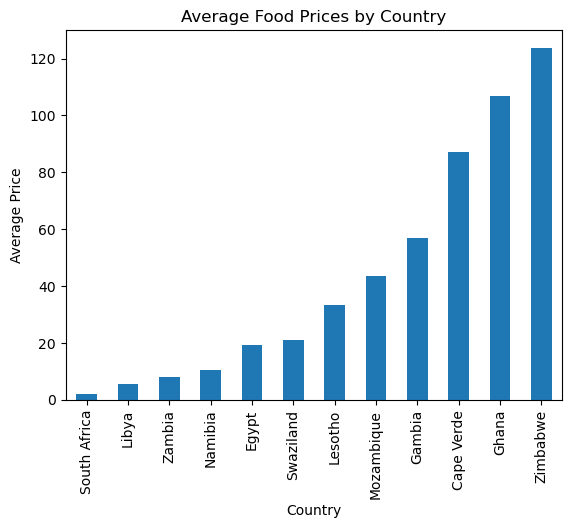

In [46]:
avg_foodPrices_byCountry.plot(kind='bar',title='Average Food Prices by Country')
plt.xlabel('Country')
plt.ylabel('Average Price')
plt.show()

### 4) What is the correlation between the prices of the food items?

In [48]:
cor_1 = df[['price','qty_exchanged']].corr()
cor_1

,price,qty_exchanged
price,1.000000,0.015053
qty_exchanged,0.015053,1.000000


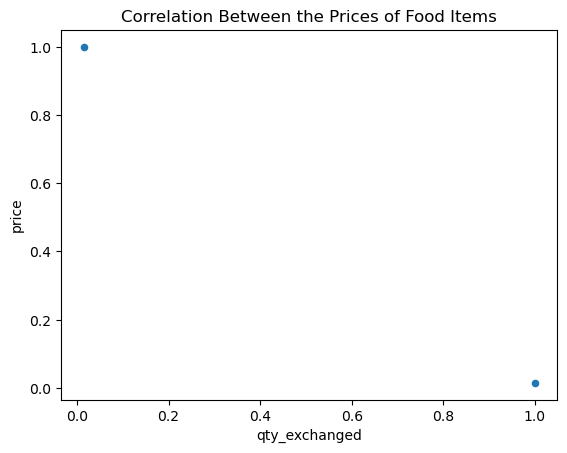

In [60]:
cor_1.plot(kind='scatter', title='Correlation Between the Prices of Food Items', x= 'qty_exchanged', y='price')
plt.xlabel('qty_exchanged')
plt.ylabel('price')
plt.show()

In [ ]:
### There is a strong postive relationship between the price and the quantity exchanged

### 5) Which countries experience the highest price volatility for food items?


In [61]:
# Group by country and calculate the standard deviation of food prices for each country
#print the top 5
price_volatility = df.groupby('country')['price'].std().sort_values(ascending=False).head()

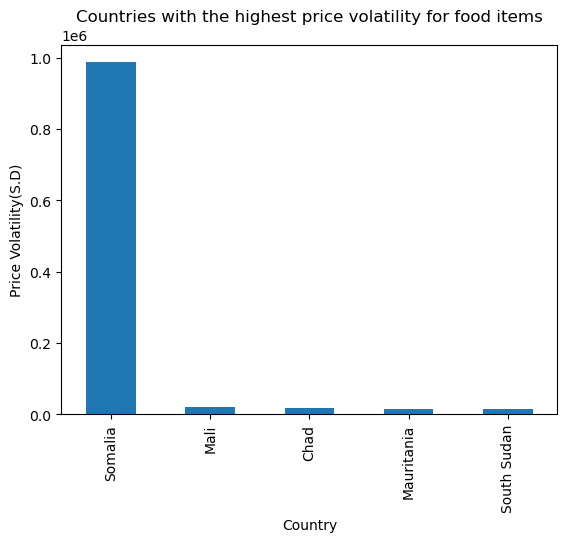

In [62]:
price_volatility.plot(kind='bar', title='Countries with the highest price volatility for food items')
plt.xlabel('Country')
plt.ylabel('Price Volatility(S.D)')
plt.show()